# DU Data Analytics-Coding Bootcamp 
- hw09_Checklist[]

[] Dependencies

In [880]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import seaborn
from matplotlib import style
style.use('fivethirtyeight')
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,Column,String,Integer,Float, Date, func

 [ ] SQLalchemy to reflect SQLite database

In [881]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

 [ ] create a python class, related to SQLite database: object oriented approach

In [882]:
class Measurements(Base):
    __tablename__ = 'hawaii_measurements'
    id = Column(Integer, primary_key = True)
    station = Column(String)
    date = Column(String)
    prcp = Column (Float)
    tobs = Column(Integer)
    def __repr__(self):

        return "<Measurements(%r, %r, %r, %r)>" % (self.station, self.date, self.prcp, self.tobs)

[ ] Perform a query to retrieve the data and precipitation scores

In [883]:
query_dp= session.query(Measurement.date,Measurement.prcp).\
order_by(Measurement.date).all()

[ ] Save the query results as a Pandas DataFrame and set the index to the date column

In [884]:
dateprcp_df = pd.DataFrame(query_dp)
# get rid of the NaN in prcp/Precipitation column
dateprcp_df = dateprcp_df.fillna(0)
dateprcp_df = dateprcp_df.set_index('date')

In [885]:
prcp_df = pd.DataFrame(query_dp)
prcp_df = prcp_df.fillna(0)
prcp_df['date_dt'] = pd.to_datetime( prcp_df['date'])
prcp_df = prcp_df.sort_values("date_dt", ascending=False).reset_index()
backupprcp_df = prcp_df.copy

[ ]  Calculate the date 1 year ago from the last data point in the database

In [886]:
mostrecent_date = prcp_df['date_dt'][0]
mostrecent_date_dt = pd.Timestamp.date(mostrecent_date)
ayearago = prcp_df['date_dt'][0] - dt.timedelta(days=365)
ayearago_dt = pd.Timestamp.date(ayearago)

[ ] Use Pandas Plotting with Matplotlib to plot the data

In [887]:
# five dates as ticks for x_axis: xticks 
loc = np.arange(0,len(prcp_df),len(prcp_df)//4)
labels = []
# run a loop to obtain array of dates for  five equally distanced x_ax-ticks
for locc in loc:
    p_loc = prcp_df['date'][locc]
    labels.append(p_loc)
# arrays for plot obtained now formatting below:

<Figure size 1440x720 with 0 Axes>

Text(0.5,1,'Precipitation of Hawaii, from 2017-08-23 to 2016-08-23')

([<matplotlib.axis.XTick at 0x1cc01c944a8>,
 <a list of 5 Text xticklabel objects>)

Text(0,0.5,'Precipitation in inches')

local copy of figure saved as Fig1_HawaiiPrecipitation.PNG


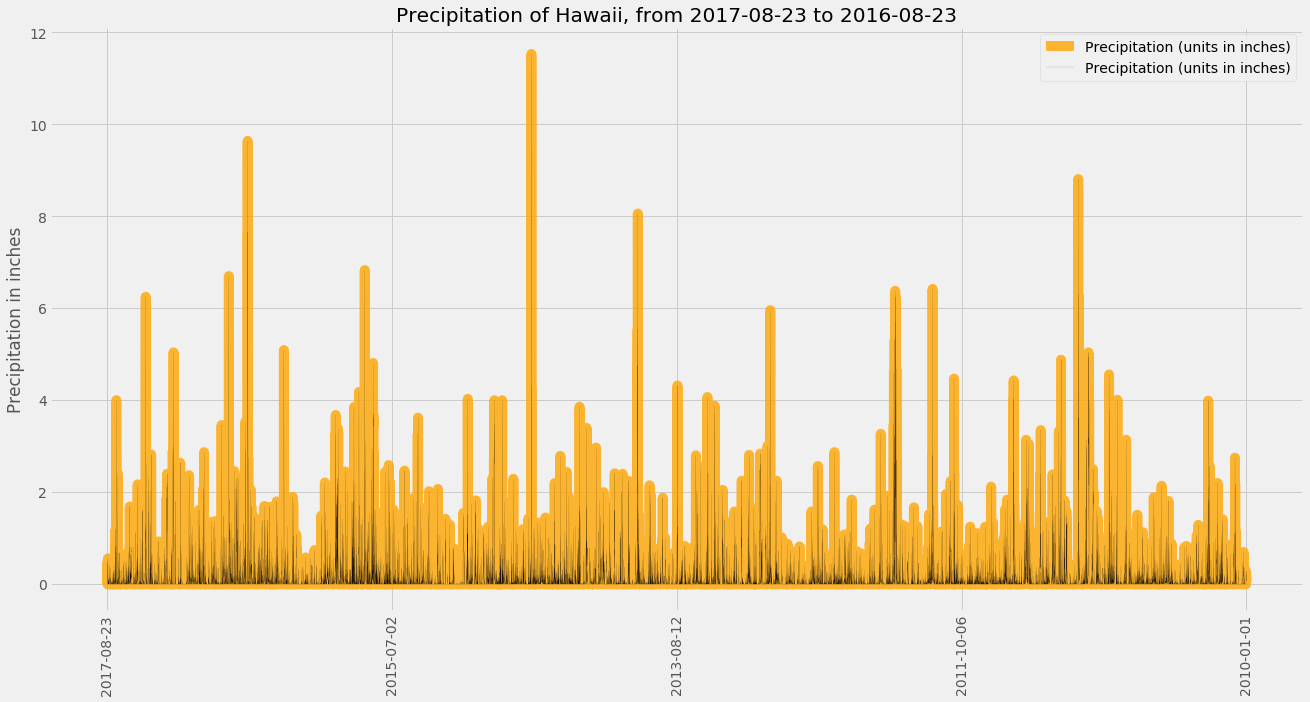

In [888]:
plt.figure(figsize=(20,10))
plt.rcParams["font.size"] = 14
plt.title('Precipitation of Hawaii, from %s to %s' %( mostrecent_date_dt,ayearago_dt))
plt.grid(True)
legend_label = 'Precitation (units in inches)'
plt.plot(prcp_df['prcp'],color='orange', linestyle='-',\
         linewidth = '10',alpha=0.8,\
         label='Precipitation (units in inches)')
# thinner second line inner positioned for ease of read
plt.plot(prcp_df['prcp'],color='black', linestyle='-',\
         linewidth = '0.1',alpha=0.9,\
         label='Precipitation (units in inches)')
plt.xticks(loc,labels,rotation="vertical") 
plt.margins(0.05) 
plt.ylabel('Precipitation in inches')
# plt.xlabel('Observation Date')
plt.legend(loc='upper right')
# plt.tight_layout()
filename1 = 'Fig1_HawaiiPrecipitation'
print('local copy of figure saved as %s.PNG' %(filename1))
plt.savefig(filename1) 
plt.show()

[ ] Use Pandas to calculate the summary statistics for the precipitation data 

In [889]:
# prcp_df.columns ['date', 'prcp']
sumstats_df = pd.DataFrame(prcp_df['prcp'].describe())
sumstats_df  #store stats into a dataframe

,prcp
count,19550.000000
mean,0.148753
std,0.453021
min,0.000000
25%,0.000000
50%,0.010000
75%,0.090000
max,11.530000


[ ] Design a query to show how many stations are available in this dataset?
  

In [890]:
count_stn = session.query(Station.station).count()
print(f'total of %i stations available in this dataset' %count_stn)

total of 9 stations available in this dataset


[ ] What are the most active stations? (i.e. what stations have the most rows)?

In [891]:
# store query results
mostactive_stnQ = session.query(Measurement.station,Measurement.tobs).\
order_by(Measurement.date).all()    

In [892]:
# convert to dataframe _df
stntobs_df = pd.DataFrame(mostactive_stnQ)
stntobs_df.head()

,station,tobs
0,USC00519397,65.0
1,USC00513117,67.0
2,USC00518838,72.0
3,USC00519523,75.0
4,USC00519281,70.0


In [893]:
# group by station per row count then sort by number of tobs then reset index so station on df as values
mostactive_df = stntobs_df.groupby('station').count().sort_values('tobs',ascending=False).reset_index()
mostactive_df.head(5)

,station,tobs
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [894]:
mostactive_stn = mostactive_df['station'][0]
mostactive_tobscount = mostactive_df['tobs'].max(0)
print('most active station in the dataset is %s with %s observations' %(mostactive_stn,mostactive_tobscount))

most active station in the dataset is USC00519281 with 2772 observations


[ ]List the stations and the counts in descending order.

In [895]:
# please refer to next above cell where _df created
mostactive_df

,station,tobs
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


* Using the station id from the previous query:

In [896]:
mostactive_dfc= stntobs_df.copy() # copy from master dataset then locate rows of most active stn
mostactivetobs_df= mostactive_dfc.loc[mostactive_dfc['station']== mostactive_stn].set_index('station')
mostactivetobs_df.describe()

,tobs
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


[ ] Calculate the lowest temperature recorded observed from most active station?

In [897]:
print('lowest temp observed by most active stn is %s'
      %mostactivetobs_df['tobs'].min()
       )

lowest temp observed by most active stn is 54.0


[ ]  highest temperature recorded observed from most active station? 

In [898]:
print('highest temp observed by most active stn is %s'
      %mostactivetobs_df['tobs'].max()
       )

highest temp observed by most active stn is 85.0


[ ]  average temperature observed from most active station?

In [899]:
print('average temp observed by most active stn is %s'
      %round(mostactivetobs_df['tobs'].mean(),2)
       )

average temp observed by most active stn is 71.66


[ ] Choose the station with the highest number of temperature observations.`

In [900]:
mostactivestation_query = session.query(Station.station,func.count(Measurement.tobs)).\
              filter(Station.station==Measurement.station).\
               group_by(Station.station).\
              order_by(func.count(Measurement.tobs).desc()).all()

In [901]:
chosen_one = mostactivestation_query[0][0] #   'USC00519281' type: string

[ ] Query the last 12 months of temperature observation data for this station  and plot the results as a histogram

In [902]:
# ayearago_dt defined above 
mostactive12mo_tobs=session.query(Measurement.tobs).\
                    filter(Measurement.station==chosen_one).\
                    filter(Measurement.date>=ayearago_dt).\
                    order_by(Measurement.tobs.desc()).all()

In [903]:
type(mostactive12mo_tobs[0]) 
# returns sqlalchemy.util._collections.result-- thus object could be parsed further to reach values

sqlalchemy.util._collections.result

In [904]:
type(mostactive12mo_tobs[0][0]) 
# returns float --thus those values should be stored in a list to obtain an array for hist

float

In [905]:
# as per the above, need to iterate through each row to collect column_name[0][0]
x_hist = [] # firstly define a list to store above mentioned floats/temp obs. values
# iter:
for i in range (0,len(mostactive12mo_tobs)):
    x_hist.append(mostactive12mo_tobs[i][0])
    #
len(x_hist) # returns 2,772 confirmed as total obs count of most active station

352

<Figure size 1296x648 with 0 Axes>

Text(0.5,1,'Temp Obs.from Most Active Station of Hawaii: USC00519281\n Dates from 2016-08-23 to 2017-08-23')

(array([ 5.,  7.,  7., 12., 27., 41., 18., 40., 72., 64., 40., 15.,  4.]),
 array([59.        , 60.84615385, 62.69230769, 64.53846154, 66.38461538,
        68.23076923, 70.07692308, 71.92307692, 73.76923077, 75.61538462,
        77.46153846, 79.30769231, 81.15384615, 83.        ]),
 <a list of 13 Patch objects>)

Text(53.555,0.5,'Observation Frequency')

Text(0.5,23.86,'Observed Temperature (F)')

a local copy of figure file saved as Fig2_HawaiiTempByMostActiveStation.PNG


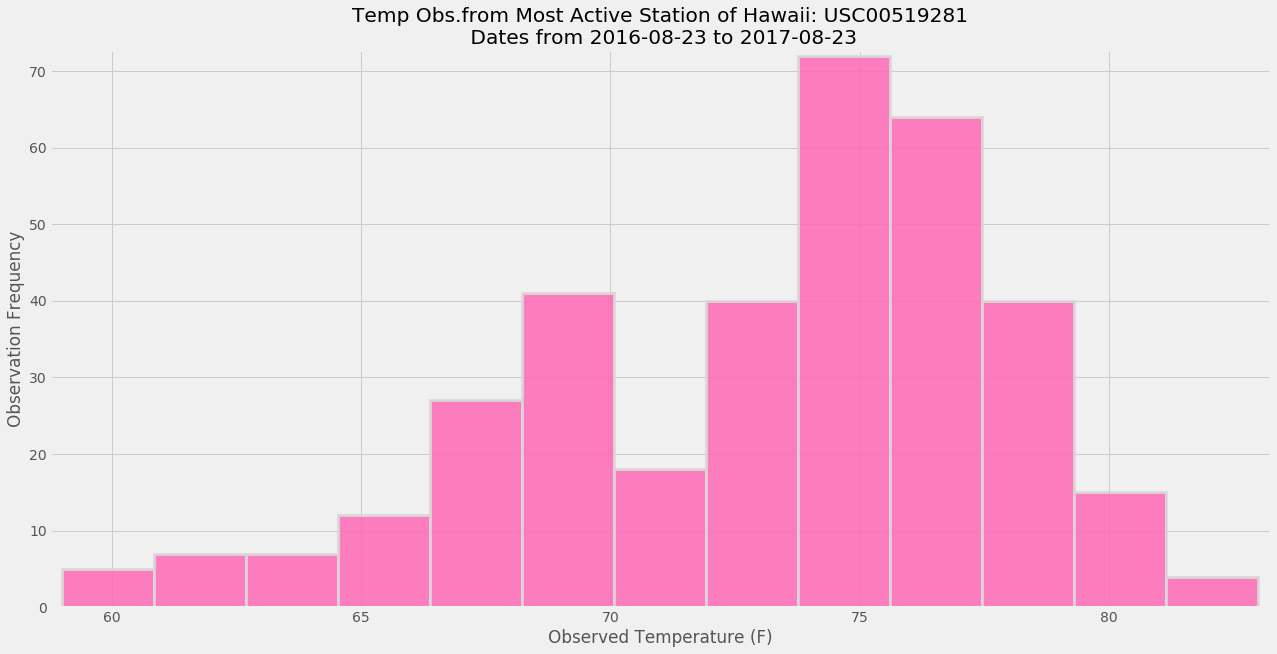

In [906]:
plt.figure(figsize=(18,9))
plt.rcParams["font.size"] = 14
plt.title('Temp Obs.from Most Active Station of Hawaii: %s\n Dates from %s to %s' %(chosen_one,ayearago_dt,mostrecent_date_dt))
plt.grid(True)
legend_label = 'Temp (units in F)'

plt.margins(0.01) 
plt.tight_layout()
plt.box(True)
plt.hist(x_hist, histtype = 'barstacked' , bins=13,color='hotpink', edgecolor='0.85',\
         linewidth=3, linestyle='-', alpha=0.85)
plt.ylabel('Observation Frequency')
plt.xlabel('Observed Temperature (F)')
filename2 = 'Fig2_HawaiiTempByMostActiveStation'
print('a local copy of figure file saved as %s.PNG' %(filename2))
plt.savefig(filename2) 
plt.show()

# Calc Temps function

In [907]:
 # This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """this function will return 
    TMIN, lowest temperature observation; TAVG, average/mean of series of observations entered; TMAX, highest temperature observation
    for a list of dates between two input dates 
    ----Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
    Returns:
        TMIN, TAVE, and TMAX
    """
# 
    temp_min = session.query(func.min(Measurement.tobs)).\
        filter(Measurement.date>=start_date).\
            filter(Measurement.date<=end_date).all()
    temp_mean = session.query(func.avg(Measurement.tobs)).\
        filter(Measurement.date>=start_date).\
            filter(Measurement.date<=end_date).all()
    temp_max = session.query(func.max(Measurement.tobs)).\
        filter(Measurement.date>=start_date).\
            filter(Measurement.date<=end_date).all()

    #     to return three tuples in return:
    return temp_min, temp_mean, temp_max
#     return 

# test function accuracy with running the code for entire table:
calc_temps('2010-01-01', '2017-08-23')
#  select min(tobs ), max(tobs), avg(tobs) from measurement; query confirmed below output

([(53.0)], [(73.09795396419437)], [(87.0)])

*  Use calc_temps to calculate the tmin, tavg, and tmax for your trip using the previous year's data for those same dates.

In [908]:
trip_startdate ='2017-07-08'
trip_enddate = '2017-07-18'
calc_temps(trip_startdate,trip_enddate)
print('calc_temps for dates from %s to %s' %(trip_startdate,trip_enddate))
print('minimum temperature: F',calc_temps('2017-07-08','2017-07-18')[0][0][0])
print('average temperature: F',round(calc_temps('2017-07-08','2017-07-18')[1][0][0],1))
print('highest temperature: F',calc_temps('2017-07-08','2017-07-18')[2][0][0])

([(69.0)], [(78.35211267605634)], [(83.0)])

calc_temps for dates from 2017-07-08 to 2017-07-18
minimum temperature: F 69.0
average temperature: F 78.4
highest temperature: F 83.0


* Plot the results from your previous query as a bar chart. 
* Use "Trip Avg Temp" as your Title
* Use the average temperature for the y value
* Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

# Calc Temp Cont'd: Data Visualization

 minimum temperature: F 69.0 
 mean temperature: F 78.4 
 maximum temperature: F 83.0
a local copy of figure file saved as Fig3_HawaiiTempStatsBarChart.PNG


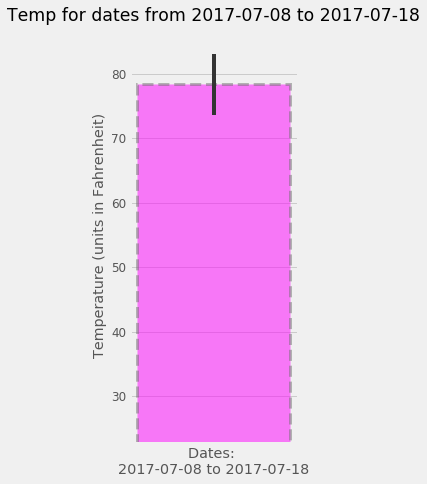

In [909]:
def plot_calc_temps(start_date, end_date):
    min = calc_temps(start_date, end_date)[0][0][0]
    mean = calc_temps(start_date, end_date)[1][0][0]
    max = calc_temps(start_date, end_date)[2][0][0]
    print(' minimum temperature: F %s \n mean temperature: F %s \n maximum temperature: F %s' %(min,round(mean,1),max))
                    
    upper = max- mean
    lower = mean- min
    # plot styling and parameters
    plt.figure(figsize=(3,6))
    plt.rcParams["font.size"] = 12
    plt.grid(True)
    legend_label = 'Temp (units in F)'
    plt.margins(0.05) 
    plt.tight_layout(False)
    plt.box(True)
    peak2peak = [upper-lower]
    error_config = {'ecolor': '0.2', 'ewidth' : '5'} #change stick color for dark_background theme
    plt.bar(0, mean, yerr=peak2peak, color='magenta', edgecolor='0.45', linewidth = 3,linestyle = '--', alpha=0.5,  error_kw=error_config,)
    plt.title('Temp for dates from %s to %s' %(start_date,end_date))
    plt.xticks([]) # remove 0.0 from ticks and leave with xlabel
    plt.ylabel('Temperature (units in Fahrenheit)')
    plt.ylim(min*.33)
    plt.xlabel('Dates: \n%s to %s' %(start_date,end_date))
    filename3 = 'Fig3_HawaiiTempStatsBarChart'
    print('a local copy of figure file saved as %s.PNG' %(filename3))
    plt.savefig(filename3) 
    plt.show()
    
######
# test function
plot_calc_temps(trip_startdate,trip_enddate)


* Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
> Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

# Rainfall DataFrame Generator

In [910]:
def prcp_rainfall(start_date, end_date):
    query_results = session.query(
        Measurement.station, Measurement.prcp,
                Station.name,Station.latitude,Station.longitude,Station.elevation).\
    group_by(Measurement.station).\
    join(Station,Measurement.station == Station.station).\
        filter(Measurement.date >= start_date).\
        filter(Measurement.date <= end_date).\
    order_by('prcp DESC').all()

    query_results_df = pd.DataFrame(query_results).fillna(0).set_index('name')
    return query_results_df 
prcp_rainfall('2010-01-01', '2017-08-23')

,station,prcp,latitude,longitude,elevation
name,,,,,
"MANOA LYON ARBO 785.2, HI US",USC00516128,0.45,21.33310,-157.80250,152.4
"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523,0.08,21.33556,-157.71139,19.5
"WAIHEE 837.5, HI US",USC00519281,0.06,21.45167,-157.84889,32.9
"HONOLULU OBSERVATORY 702.2, HI US",USC00511918,0.00,21.31520,-157.99920,0.9
"KANEOHE 838.1, HI US",USC00513117,0.00,21.42340,-157.80150,14.6
"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830,0.00,21.52130,-157.83740,7.0
"WAIKIKI 717.2, HI US",USC00519397,0.00,21.27160,-157.81680,3.0
"PEARL CITY, HI US",USC00517948,0.00,21.39340,-157.97510,11.9
"UPPER WAHIAWA 874.3, HI US",USC00518838,0.00,21.49920,-158.01110,306.6


# Rainfall cont'd: Data Visualization

a local copy of figure file saved as Fig4_HawaiiRainfallPerStation.PNG


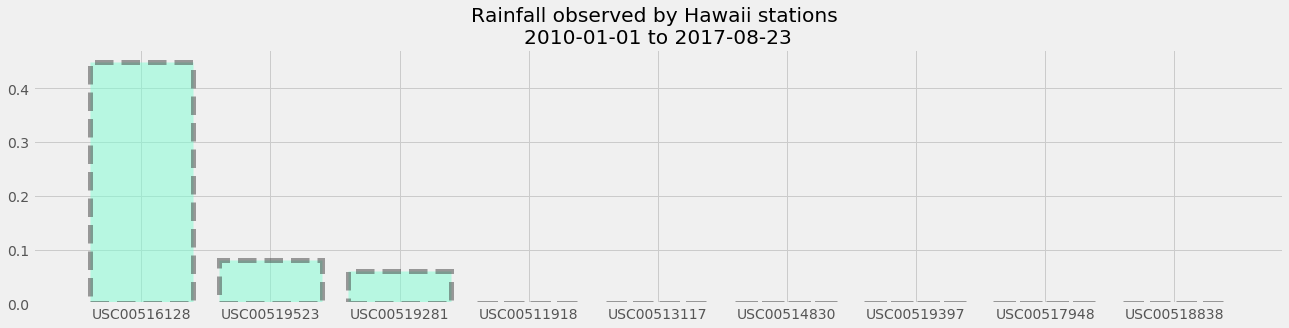

<Figure size 432x288 with 0 Axes>

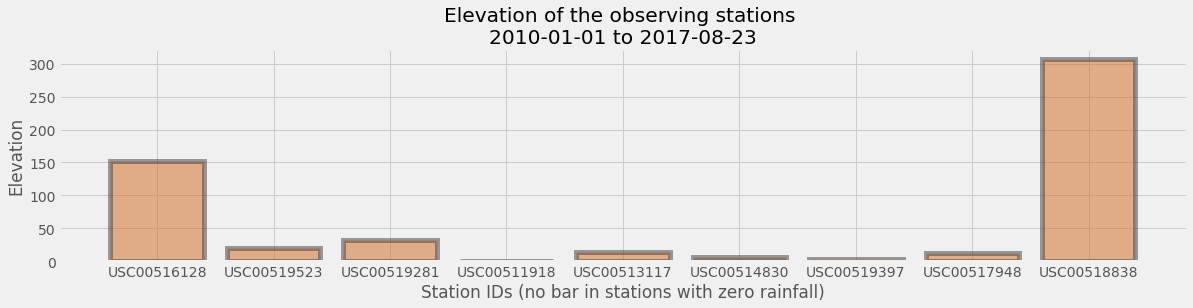

,station,prcp,latitude,longitude,elevation
name,,,,,
"MANOA LYON ARBO 785.2, HI US",USC00516128,0.45,21.33310,-157.80250,152.4
"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523,0.08,21.33556,-157.71139,19.5
"WAIHEE 837.5, HI US",USC00519281,0.06,21.45167,-157.84889,32.9
"HONOLULU OBSERVATORY 702.2, HI US",USC00511918,0.00,21.31520,-157.99920,0.9
"KANEOHE 838.1, HI US",USC00513117,0.00,21.42340,-157.80150,14.6
"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830,0.00,21.52130,-157.83740,7.0
"WAIKIKI 717.2, HI US",USC00519397,0.00,21.27160,-157.81680,3.0
"PEARL CITY, HI US",USC00517948,0.00,21.39340,-157.97510,11.9
"UPPER WAHIAWA 874.3, HI US",USC00518838,0.00,21.49920,-158.01110,306.6


In [911]:
def plot_prcp_rainfall(start_date,end_date):
    plot_df = prcp_rainfall(start_date,end_date)
    # plot styling and parameters
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"] = 14
    
    legend_label = 'Rainfall per station, Hawaii'
    plt.margins(0.05) 
    plt.tight_layout(False)
    plt.box(True)
    plt.figure(1)
    plt.subplot(211)
    plt.grid(True)
    plt.title('Rainfall observed by Hawaii stations \n%s to %s' %(start_date,end_date))
    plt.bar(plot_df['station'], plot_df['prcp'], color='aquamarine', edgecolor='0.25', linewidth = 5,linestyle = '--', alpha=0.5),
    plt.figure(2)
    plt.figure(figsize=(18,8))
    plt.subplot(212)
    
    plt.rcParams["font.size"] = 14
    plt.grid(True)
    plt.bar(plot_df['station'], plot_df['elevation'], color='chocolate', edgecolor='0.25', linewidth = 5,linestyle = '-', alpha=0.5),
    plt.title('Elevation of the observing stations \n%s to %s' %(start_date,end_date))
#     plt.xticks([]) # remove 0.0 from ticks and leave with xlabel
    plt.ylabel('Elevation')
    plt.xlabel('Station IDs (no bar in stations with zero rainfall)')

    #     save a local copy
    filename4 = 'Fig4_HawaiiRainfallPerStation'
    print('a local copy of figure file saved as %s.PNG' %(filename4))
    plt.savefig(filename4) 
    plt.show()
    return plot_df
# ===========test_function
plot_prcp_rainfall('2010-01-01','2017-08-23')

# Optional Challenge Assignment
-  Create a query that will calculate the daily normals 
 >  (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

In [912]:
def daily_normals(date):
    """Daily Normals.    
    Args:
        date (str): A date string in the format '%m-%d'        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax    
    """   
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    
    
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
# ==============TEST FUNCTION BELOW
daily_normals("01-03")

[(62.0, 68.9090909090909, 77.0)]

# Optional Challenge_Xtra_1.0
> define a function that distills all tuple-like objects and will return a clean dataframe for the dates selected by the user
- define a user friendly function that will enable users a better view of data via Pandas, help function processing objects SQLite and SQLalchemy and finally plotting via MatPlotLib

In [915]:
def dates_normals(start_date,end_date):
    """Dates Normals.    
    Args:start_date (str): first date string in the format '%m-%d'        
        end_date (str): last date as string in the format '%m-%d'        
    Returns:A dataframe for  daily normals: tmin, tavg, and tmax with index of date
    """     
    dummynormals_df,datesnormals_df=[],[]
    Date_Index,Tmin_list, Tmean_list, Tmax_list = [],[],[],[]
    print("\n>> user input received. . . . . . . . . . . . \n")
    print("StartDate \tEndDate")
    print(start_date,"\t",end_date)
#     ------------------------
    print("\n>> query : SQLite . . . . . . . . . . . . . . .")
    dates = session.query(Measurement.date).filter(Measurement.date >= start_date).\
    filter(Measurement.date <= end_date).group_by(Measurement.date).\
    order_by(Measurement.date).all()
#     ----------------
    dummynormals_df = pd.DataFrame(dates)
# --------------------
    print("\n>> iteration process for lists of temps. . . . . . . . ")
    #     ---------------
    for date in dummynormals_df['date']:
#         format to 'mm-dd'
        date_md = date[-5:]
#         Tmin: query for minimum of all those with same 'mm-dd' formatted dates
        MIN_date = session.query(func.min(Measurement.tobs)).\
        filter(func.strftime("%m-%d", Measurement.date) == date_md).all()
        Tmin_list.append(MIN_date[0][0])
    
#         Tmean: same above
        MEAN_date = session.query(func.avg(Measurement.tobs)).\
        filter(func.strftime("%m-%d", Measurement.date) == date_md).all()
        Tmean_list.append(MEAN_date[0][0])
    
#         Tmax: same above
        MAX_date = session.query(func.max(Measurement.tobs)).\
        filter(func.strftime("%m-%d", Measurement.date) == date_md).all()
        Tmax_list.append(MAX_date[0][0])
    
#        stip-off dates to use mm-dd as index later
        Date_Index.append(date[-5:])

#         ------------------
    print("   | \n>> |_list for min temp created. . . . . . . . . . . .")
    print(Tmin_list)
    print("   | \n>> |_list for avg temp created. . . . . . . . . . . .")
    print(Tmean_list)
    print("   | \n>> |_list for max temp created. . . . . . . . . . . .")
    print(Tmax_list)
    print("   | \n>> |_list for dates mm-dd created. . . . . . . . . . .")
    print(Date_Index)

    datesnormals_df = pd.DataFrame({
        'Dates' : Date_Index,
        'Temp_Min': Tmin_list,
        'Temp_Avg': Tmean_list,
        'Temp_Max': Tmax_list                                
    })
    print("\n>> dataframe created . . . . . . . . . . . . . . ")
    print("   | \n>columns")
    print(datesnormals_df.columns)
    datesnormals_df = datesnormals_df.set_index('Dates')
    print("   | \n>date set as index, no longer column")
    print(datesnormals_df.columns)
    print("   | \n>dataframe stats")
    print(datesnormals_df.describe())
    print("   | \n>dataframe by numbers")
    print(datesnormals_df.count())
    print("   | \n>add column for T_norm")
    datesnormals_df['T_norm'] = datesnormals_df.mean(axis=1)
    print(datesnormals_df['T_norm'])
    print("   | \n>dataframe rendered table view by Pandas\n   |  \n   | \n")
#     ----------------
    return datesnormals_df
# ==============TEST FUNCTION BELOW=================================
dates_normals(trip_startdate,trip_enddate)


>> user input received. . . . . . . . . . . . 

StartDate 	EndDate
2017-07-08 	 2017-07-18

>> query : SQLite . . . . . . . . . . . . . . .

>> iteration process for lists of temps. . . . . . . . 
   | 
>> |_list for min temp created. . . . . . . . . . . .
[69.0, 68.0, 68.0, 70.0, 67.0, 69.0, 61.0, 68.0, 70.0, 70.0, 72.0]
   | 
>> |_list for avg temp created. . . . . . . . . . . .
[76.08333333333333, 76.19298245614036, 75.62068965517241, 75.78947368421052, 75.96491228070175, 76.1896551724138, 76.2280701754386, 76.2542372881356, 76.34482758620689, 76.30188679245283, 76.63793103448276]
   | 
>> |_list for max temp created. . . . . . . . . . . .
[83.0, 83.0, 82.0, 81.0, 82.0, 81.0, 82.0, 82.0, 83.0, 83.0, 83.0]
   | 
>> |_list for dates mm-dd created. . . . . . . . . . .
['07-08', '07-09', '07-10', '07-11', '07-12', '07-13', '07-14', '07-15', '07-16', '07-17', '07-18']

>> dataframe created . . . . . . . . . . . . . . 
   | 
>columns
Index(['Dates', 'Temp_Min', 'Temp_Avg', 'Temp_Max'], d

,Temp_Min,Temp_Avg,Temp_Max,T_norm
Dates,,,,
07-08,69.0,76.083333,83.0,76.027778
07-09,68.0,76.192982,83.0,75.730994
07-10,68.0,75.620690,82.0,75.206897
07-11,70.0,75.789474,81.0,75.596491
07-12,67.0,75.964912,82.0,74.988304
07-13,69.0,76.189655,81.0,75.396552
07-14,61.0,76.228070,82.0,73.076023
07-15,68.0,76.254237,82.0,75.418079
07-16,70.0,76.344828,83.0,76.448276


# Optional Challenge _Xtra_1.1

> modify above function for data visualization under a new name!


>> user input received. . . . . . . . . . . . 
StartDate 	EndDate
2017-08-08 	 2017-08-18

>> query : SQLite . . . . . . . . . . . . . . .

>> iteration process for lists of temps. . . . . . . . 
   | 
>> |_list for min temp created. . . . . . . . . . . .
[68.0, 69.0, 65.0, 67.0, 67.0, 71.0, 71.0, 69.0, 69.0, 69.0, 70.0]
   | 
>> |_list for avg temp created. . . . . . . . . . . .
[76.5576923076923, 75.98039215686275, 76.42, 75.98113207547169, 76.52727272727273, 76.98245614035088, 76.77777777777777, 76.47169811320755, 76.08, 76.125, 76.92307692307692]
   | 
>> |_list for max temp created. . . . . . . . . . . .
[83.0, 81.0, 83.0, 82.0, 83.0, 84.0, 82.0, 83.0, 83.0, 83.0, 84.0]
   | 
>> |_list for dates mm-dd created. . . . . . . . . . .
['08-08', '08-09', '08-10', '08-11', '08-12', '08-13', '08-14', '08-15', '08-16', '08-17', '08-18']

>> dataframe created . . . . . . . . . . . . . . 
   | 
>columns
Index(['Dates', 'Temp_Min', 'Temp_Avg', 'Temp_Max'], dtype='object')
   | 
>date set as 

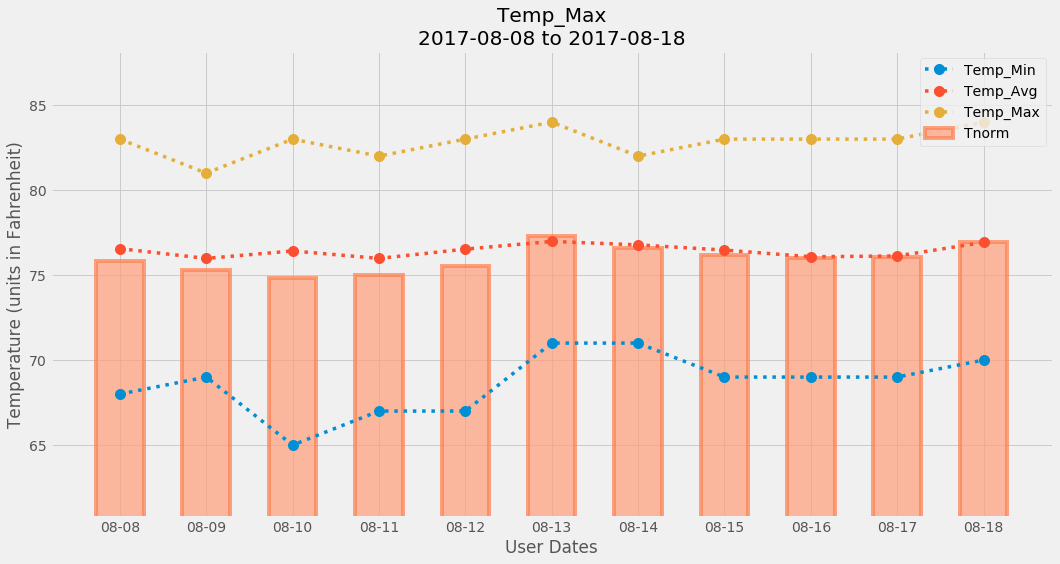

,Temp_Min,Temp_Avg,Temp_Max
Dates,,,
08-08,68.0,76.557692,83.0
08-09,69.0,75.980392,81.0
08-10,65.0,76.420000,83.0
08-11,67.0,75.981132,82.0
08-12,67.0,76.527273,83.0
08-13,71.0,76.982456,84.0
08-14,71.0,76.777778,82.0
08-15,69.0,76.471698,83.0
08-16,69.0,76.080000,83.0


In [914]:
def plot_dates_normals(start_date,end_date):
#     run above function for dataframe and drop T_norm for separate plot
    plot_df = dates_normals(start_date,end_date).drop(columns='T_norm')
    plt.figure(figsize=(16,8))
#--------------loop through remaining columns
    for temp in plot_df.columns:
#--------------logging process notes each iteration        
        print(temp +" plotting. . . . ")
        plt.rcParams["font.size"] = 14
        plt.grid(True)
        plt.title('%s\n%s to %s' %(temp,start_date,end_date))
        plt.xlabel("User Dates")
        plt.ylabel('Temperature (units in Fahrenheit)')
#--------------iterate through columns
#         plt(stacked=True)
        plt.plot(plot_df.index, plot_df[temp], linestyle=':',\
                 linewidth=3.5,marker = 'o',markersize=10,label=temp)
#--------------plot T_norm by its math formula as a row mean average
    plt.bar(plot_df.index,plot_df.mean(axis=1), width= 0.55, edgecolor='coral',linestyle='-' ,linewidth=4,\
            alpha = 0.70, align='center', color = 'lightsalmon', label = 'Tnorm')
#--------------set plot limit
    plt.ylim(plot_df[temp].min()*.75)
    plt.legend(loc='best')
#     plt.show()
# -------------save a local copy
    filename5 = 'Fig5_HawaiiTempNormalsForDates'
    print('\n    |\n>>  |_a local copy of figure file saved as %s.PNG' %(filename5))
    plt.savefig(filename5) 
    plt.show()
    return plot_df
# --------TEST_FUNCTION----------------
plot_dates_normals('2017-08-08','2017-08-18')